In [ ]:
import fastkde
import numpy as np
import matplotlib.pyplot as plt

from math import atan,sin,cos
from matplotlib import cm

points = np.genfromtxt("./soucefile/coords.csv", delimiter=",")
centriod = np.mean(points, axis=0)
points_len=len(points)


In [ ]:
x_centered= points[:,0]-centriod[0]
y_centered = points[:,1] - centriod[1]

plt.figure(figsize=(15,15),dpi=600)
plt.scatter(x_centered, y_centered,s=15,c='red',alpha=0.6)

In [ ]:
points_hough_len=int(points_len*(points_len-1)/2)

points_hough = np.zeros(shape=(points_hough_len,4))

In [ ]:
for i in range(points_len):
    for j in range(i+1,points_len):
        idx = int(i*points_len - i*(i+1)/2+j-i-1)

        x_i,y_i = points[i]-centriod
        x_j,y_j = points[j]-centriod

        theta = atan((x_j-x_i)/(y_i-y_j))
        
        rho = x_i*cos(theta)+y_i*sin(theta)

        
        points_hough[idx][0] = theta
        points_hough[idx][1] = rho
        points_hough[idx][2] = i
        points_hough[idx][3] = j

In [6]:
x_plot = points_hough[:,0]
y_plot = points_hough[:,1]/1000

plt.figure(figsize=(15,15),dpi=600)
plt.scatter(x_plot, y_plot,s=5)

# 方案一
对全域进行KDE

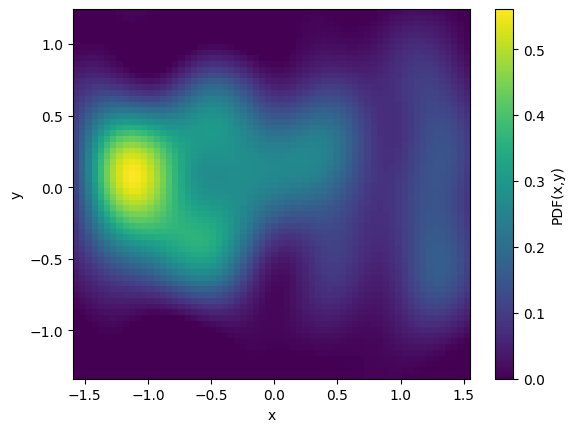

In [ ]:
PDF = fastkde.pdf(x_plot, y_plot, var_names = ['x', 'y'])
PDF.plot();

In [8]:
x_grid_range = np.linspace(-np.pi/2,np.pi/2,100)
y_grid_range = np.linspace(-1.5,1.5,100)
x_grid,y_grid = np.meshgrid(x_grid_range,y_grid_range)

x_grid_flatten = x_grid.flatten()
y_grid_flatten = y_grid.flatten()

grid_points = list(zip(x_grid_flatten,y_grid_flatten))


test_point_pdf_value = fastkde.pdf_at_points(x_plot,y_plot,list_of_points = grid_points)
test_point_pdf_value_2d = test_point_pdf_value.reshape(100,100)

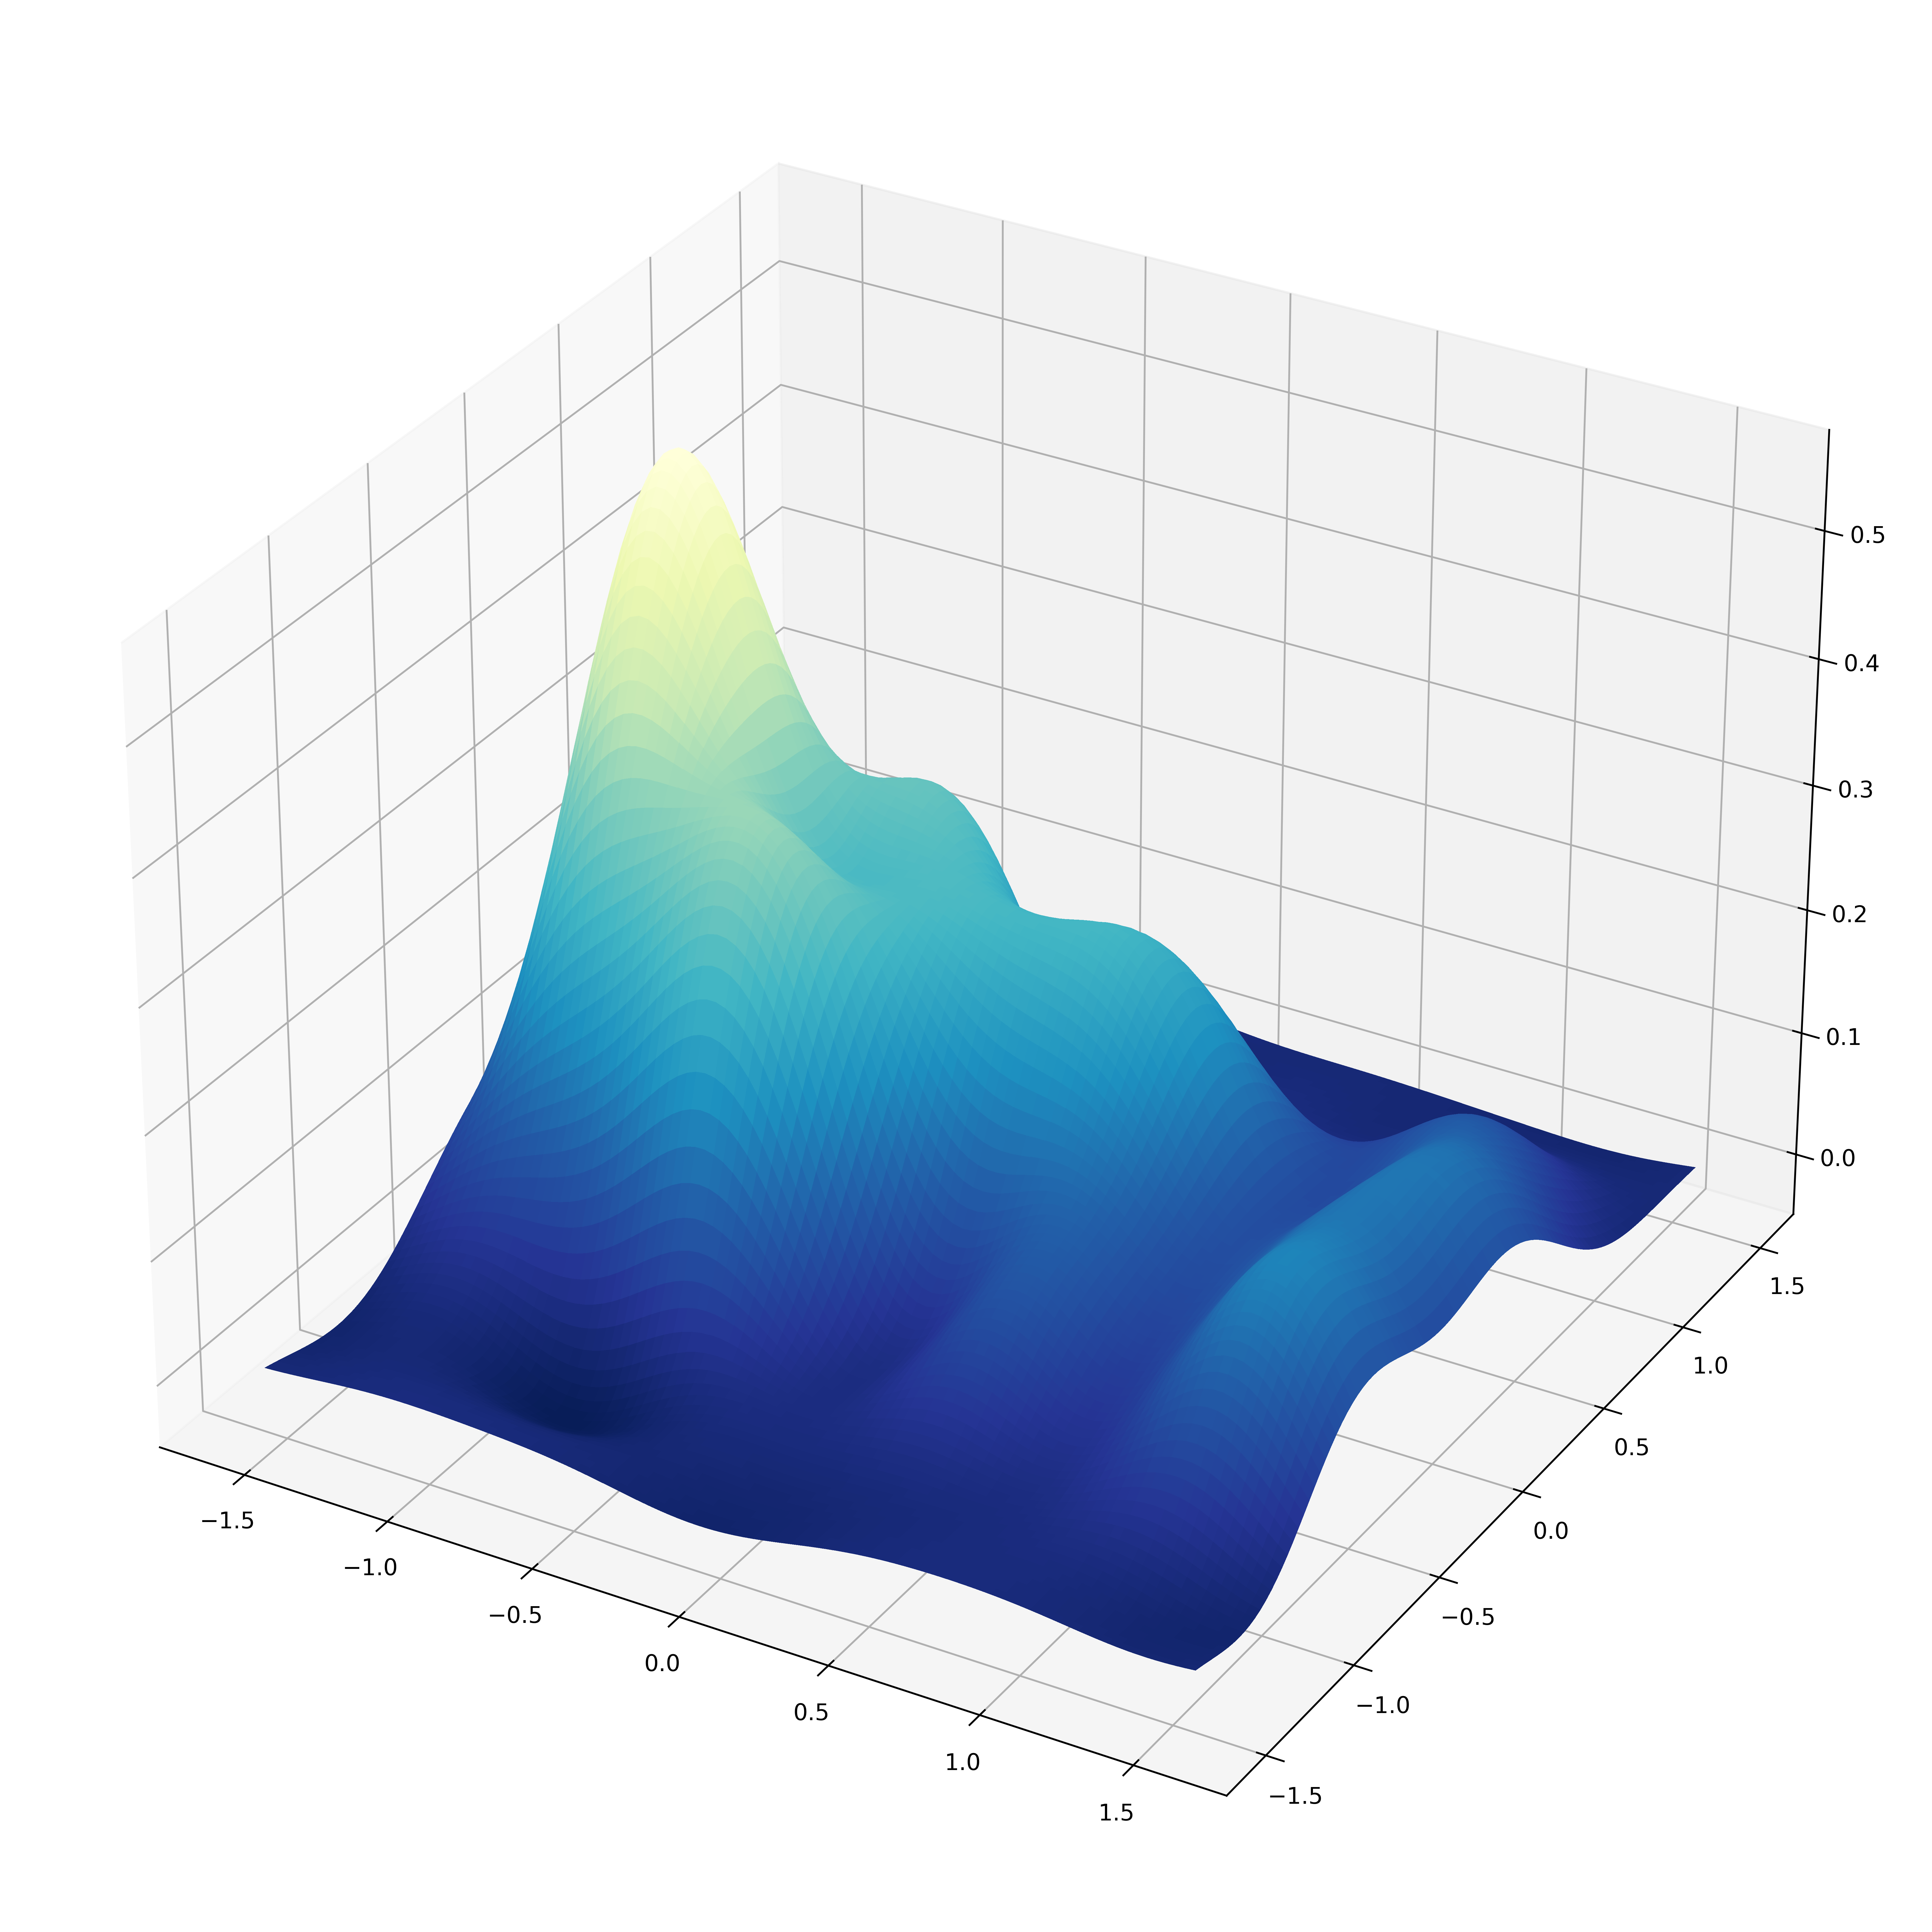

In [ ]:
ax = plt.figure(figsize=(20,15),dpi=600).add_subplot(projection='3d')
surf = ax.plot_surface(x_grid, y_grid, test_point_pdf_value_2d, rstride=1, cstride=1, cmap=cm.get_cmap('YlGnBu_r'),
                       linewidth=0, antialiased=False)

# 方案二
将$(-\pi/2 , \pi/2)$进一步划分，划分成$(-\pi/2 , 0)$和$(0, \pi/2)$，分别进行KDE

In [12]:
points_hough_left =points_hough[points_hough[:,0] < 0]
points_hough_right =points_hough[points_hough[:,0] > 0]

x_left = points_hough_left[:,0]
y_left = points_hough_left[:,1]/1000
x_right = points_hough_right[:,0]
y_right = points_hough_right[:,1]/1000

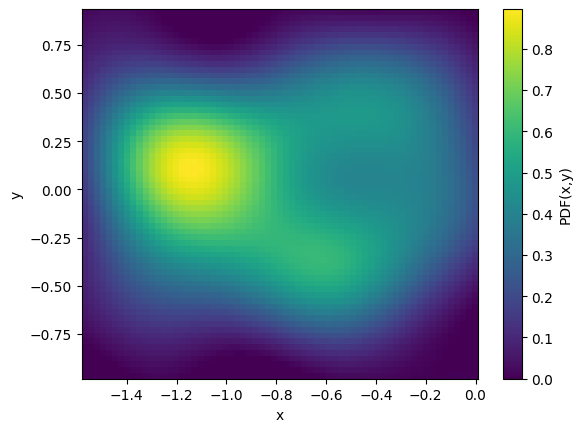

In [ ]:
PDF = fastkde.pdf(x_left, y_left, var_names = ['x', 'y'])
PDF.plot();

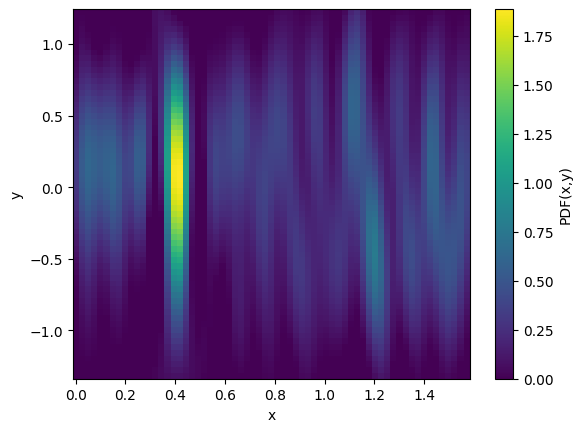

In [ ]:
PDF = fastkde.pdf(x_right, y_right, var_names = ['x', 'y'])
PDF.plot();

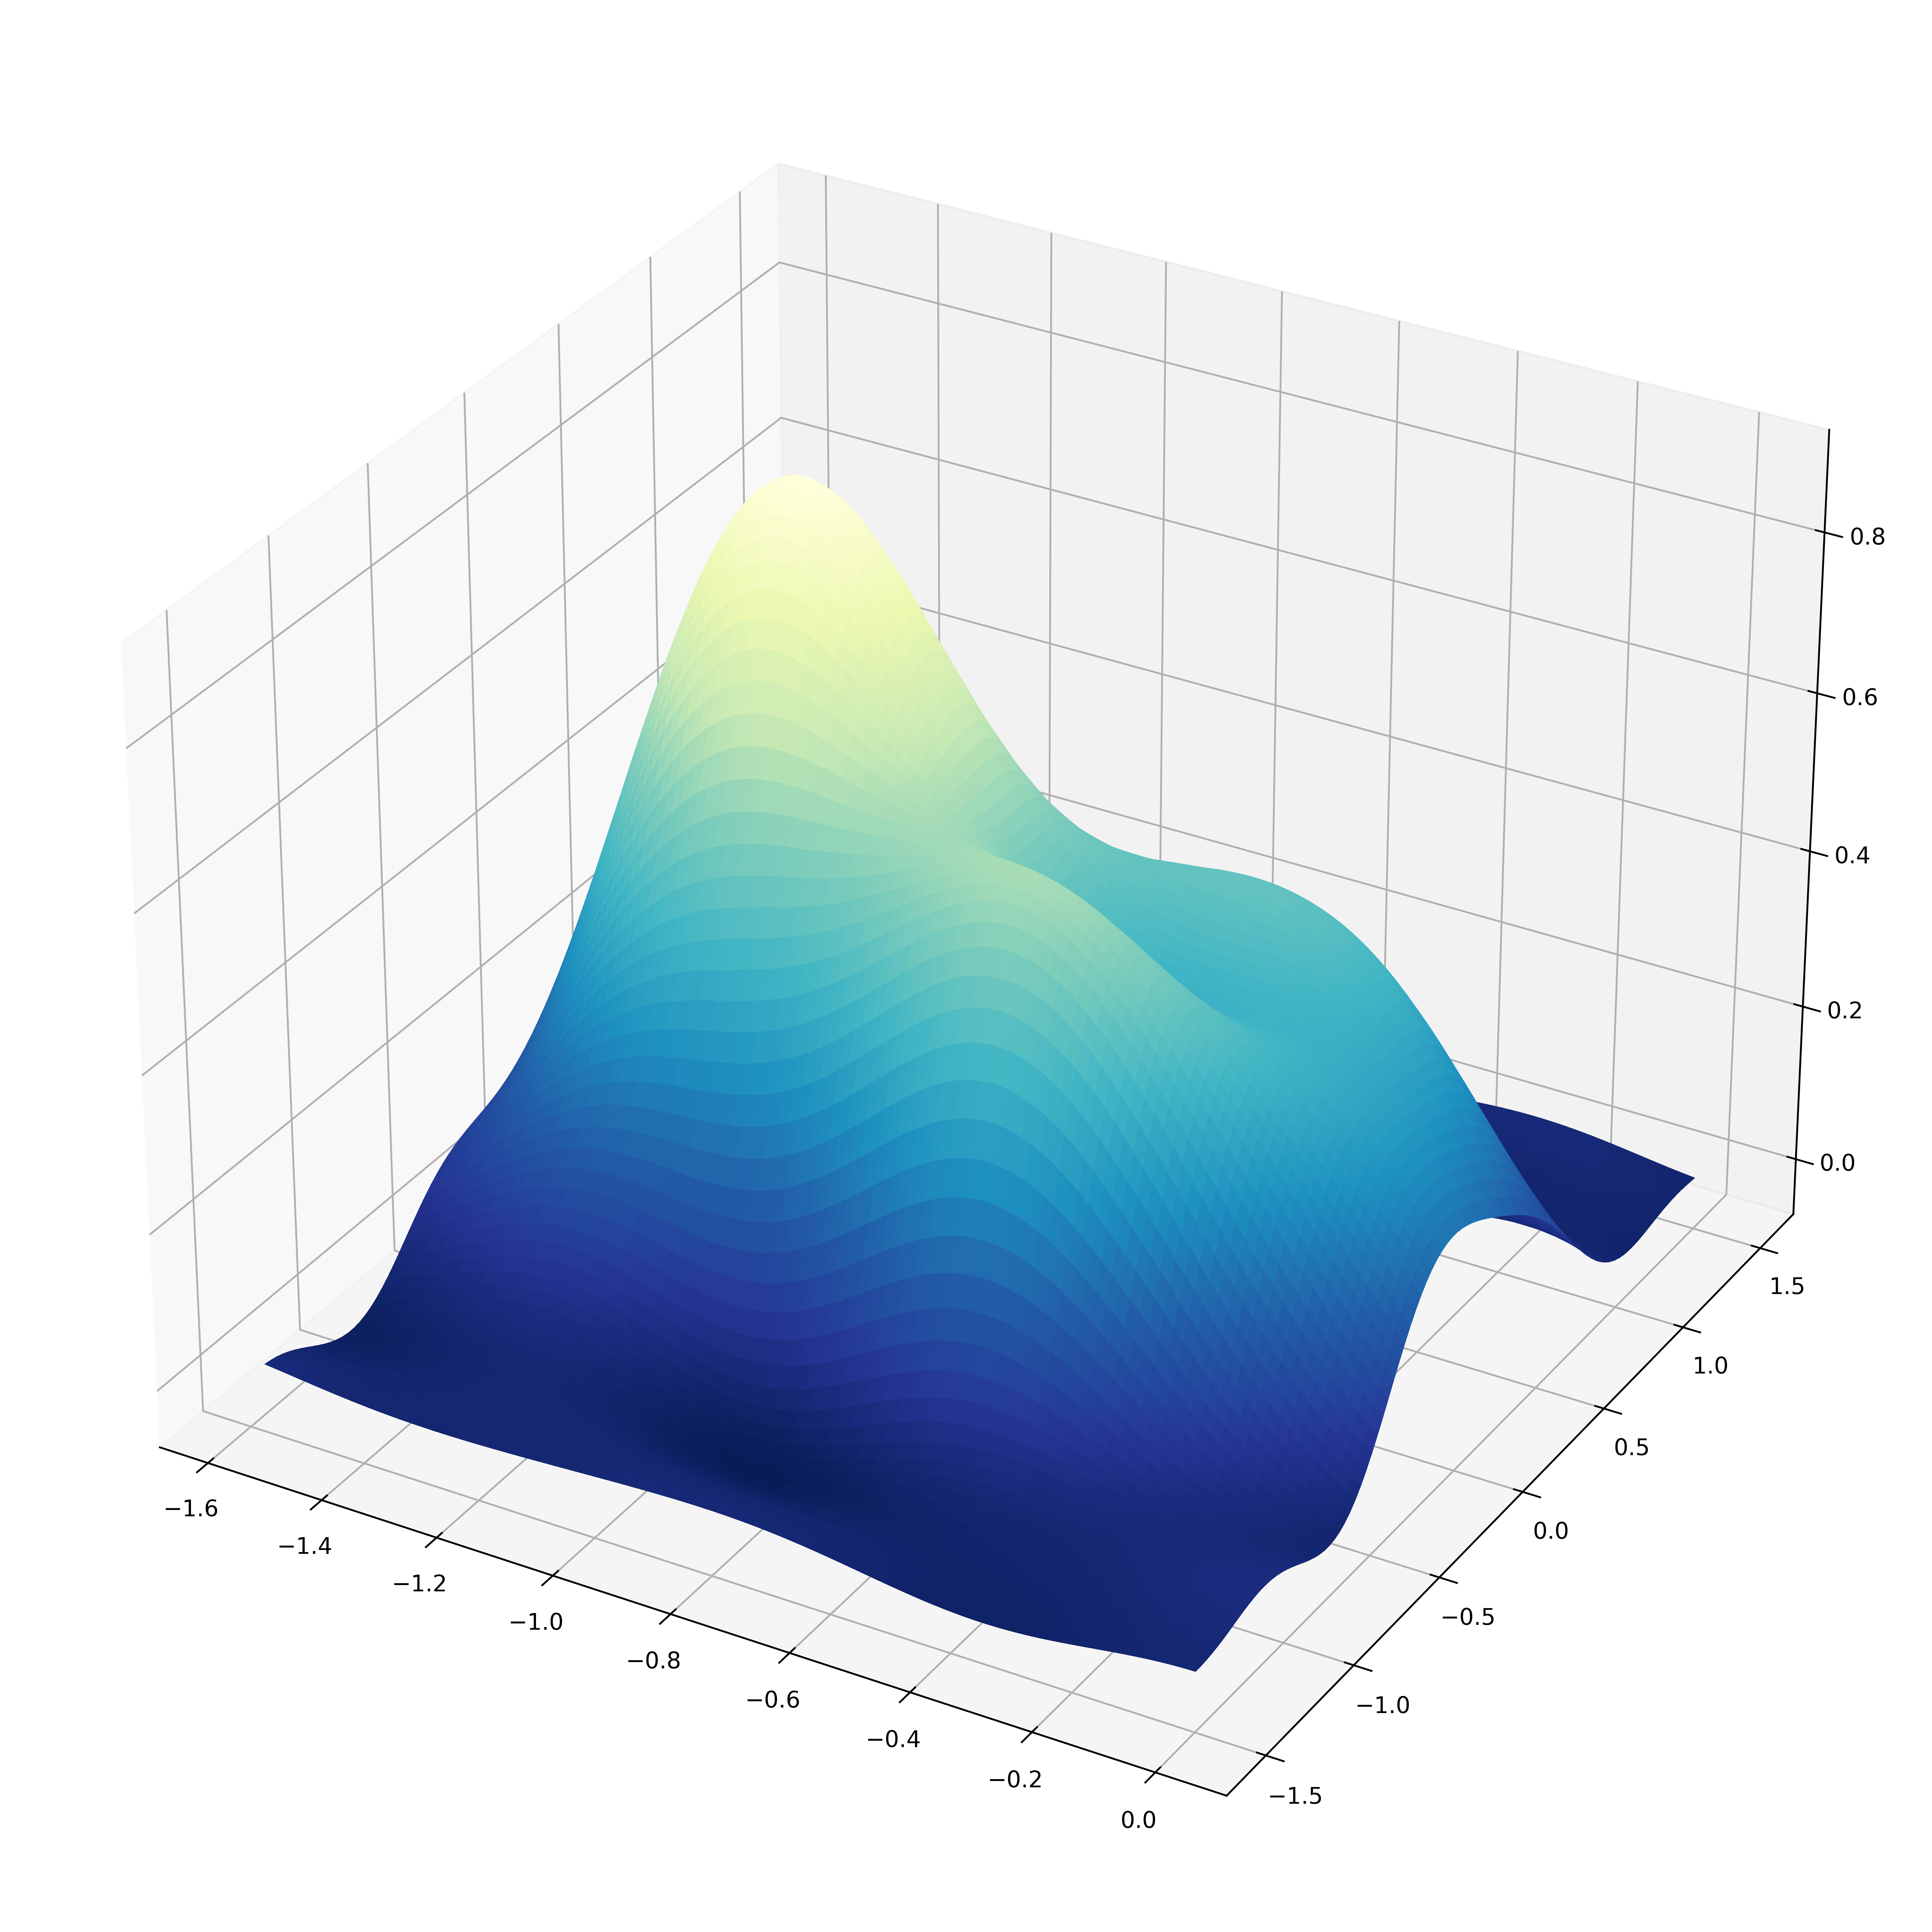

In [ ]:
x_grid_range = np.linspace(-np.pi/2,0,100)
y_grid_range = np.linspace(-1.5,1.5,100)

x_grid,y_grid = np.meshgrid(x_grid_range,y_grid_range)

x_grid_flatten = x_grid.flatten()
y_grid_flatten = y_grid.flatten()

grid_points = list(zip(x_grid_flatten,y_grid_flatten))

test_point_pdf_value = fastkde.pdf_at_points(x_left,y_left,list_of_points = grid_points)
test_point_pdf_value_2d = test_point_pdf_value.reshape(100,100)

ax = plt.figure(figsize=(20,15),dpi=600).add_subplot(projection='3d')
surf = ax.plot_surface(x_grid, y_grid, test_point_pdf_value_2d, rstride=1, cstride=1, cmap=cm.get_cmap('YlGnBu_r'),
                       linewidth=0, antialiased=False)

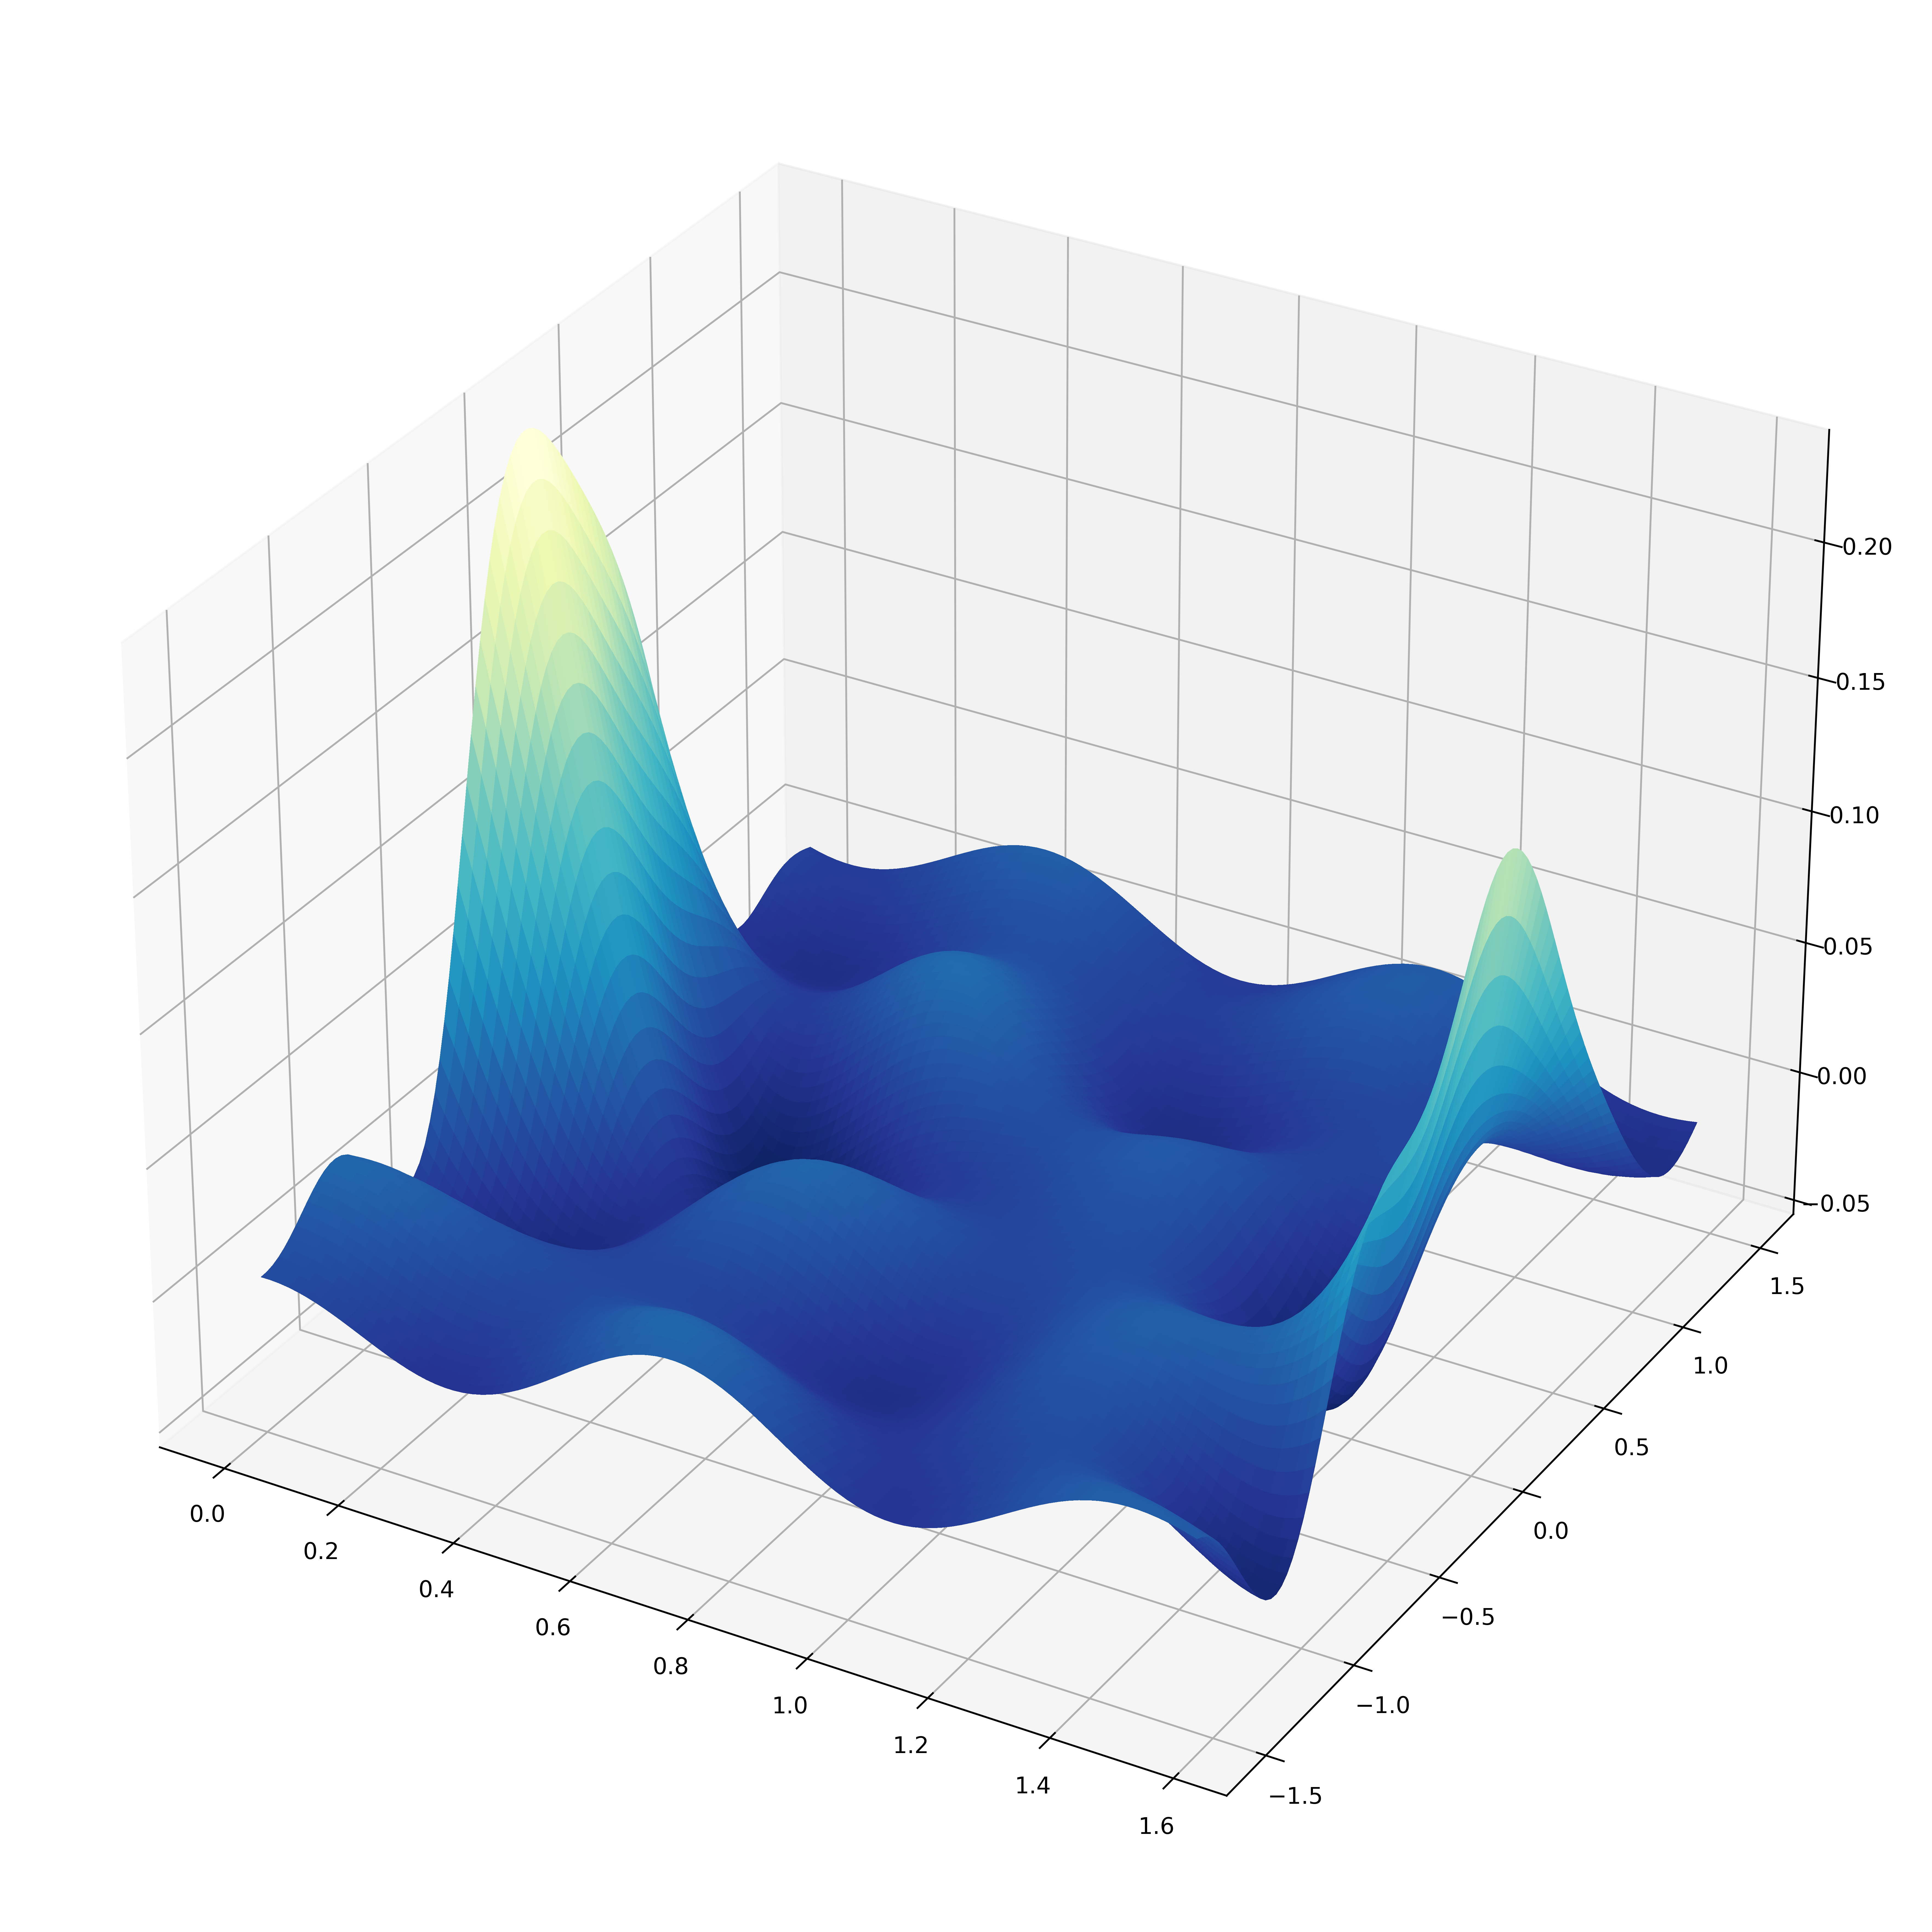

In [ ]:
x_grid_range = np.linspace(0,np.pi/2,100)
y_grid_range = np.linspace(-1.5,1.5,100)

x_grid,y_grid = np.meshgrid(x_grid_range,y_grid_range)

x_grid_flatten = x_grid.flatten()
y_grid_flatten = y_grid.flatten()

grid_points = list(zip(x_grid_flatten,y_grid_flatten))

test_point_pdf_value = fastkde.pdf_at_points(x_left,y_left,list_of_points = grid_points)
test_point_pdf_value_2d = test_point_pdf_value.reshape(100,100)

ax = plt.figure(figsize=(20,15),dpi=600).add_subplot(projection='3d')
surf = ax.plot_surface(x_grid, y_grid, test_point_pdf_value_2d, rstride=1, cstride=1, cmap=cm.get_cmap('YlGnBu_r'),
                       linewidth=0, antialiased=False)

## step1. hough_transform
找交点

## step2. applying KDE to intersection points
将$(-\pi/2 , \pi/2)$划分成$(-\pi/2 , 0)$和$(0, \pi/2)$，分别进行KDE

## step3. finding maximum 
project the pdf metrix along theta axes, using the maximum value of pdf along theta axes

## step4. finding the target range
finding the local minimum values, then compare the maximum values range which are found between the two local minimum values, compare the pair of points index, choose the minimum 
1. 检查点的索引对，索引对的两列中，有没有哪一列缺项，缺项最少的胜出
2. 如果索引对的两列缺项的个数相当，衡量两列的墒值，取墒值最小的那一列按照次序进行排序
3. 
4. entropy $H(X)=-\sum _{i=1}^n p(x_i)\log_2 p(x_i)$